In [1]:
'''

circle equation for classifier: (x-a)*2+(y-b)*2=r*2

for ml: (x1-a1)*2+(x2-a2)*2+(x3-a3)*2--- =r*2


'''

'\n\ncircle equation for classifier: (x-a)*2+(y-b)*2=r*2\n\nfor ml: (x1-a1)*2+(x2-a2)*2+(x3-a3)*2--- =r*2\n\n\n'

# Implementation

In [2]:
from sklearn import datasets
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<Axes: >

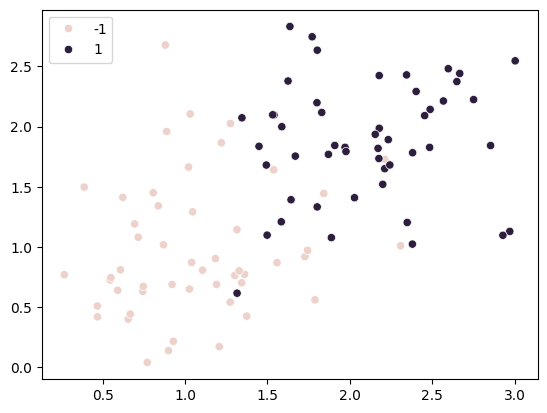

In [3]:
# creating a random data set
a,b=datasets.make_blobs(n_samples=100,n_features=2,centers=[[1,1],[2,2]],cluster_std=0.45)
b[b==0]=-1
sns.scatterplot(x=a[:,0],y=a[:,1],hue=b)

# Class way

In [4]:

def plot_line(W,w0,x,y):
  x_values = np.linspace(x[:,0].min() ,x[:,0].max() ,100)
  slope = -W[0]/W[1]
  intercept  =  -w0/W[1]
  y_values = slope*x_values+intercept
  sns.scatterplot(x = x[:,0], y = x[:,1], hue = y)
  plt.plot(x_values,y_values,c='r')
  plt.show()

def distance_from_line(W,w0,xi):
  d = (W@xi+w0)/np.linalg.norm(W)
  return d

def perceptron(W,w0,x,y,iter=10):
  for i in range(iter):
    print('iteration - ',i)
    mis_classifcation = 0
    for xi,yi in zip(x,y):
      d = distance_from_line(W,w0,xi)
      if np.sign(d)!=yi:
        mis_classifcation = mis_classifcation+1
        W = W + (xi*yi)
        w0 = w0 + yi
    print("Current Accuracy = ",100 - (mis_classifcation/y.shape[0])*100)
    print("W1: {}, W2: {}, w0: {}".format(W[0], W[1], w0))

    plot_line(W,w0,x,y)
    if mis_classifcation==0:
      return W,w0

  return W,w0

iteration -  0
Current Accuracy =  67.0
W1: 3.7390800612947013, W2: 1.6231642671404183, w0: -6


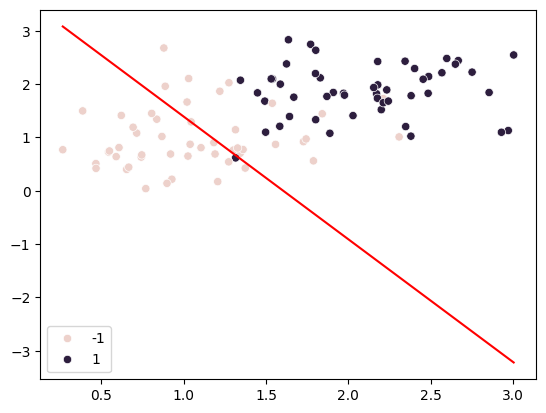

iteration -  1
Current Accuracy =  72.0
W1: 5.9719031216983645, W2: 1.698413744178898, w0: -10


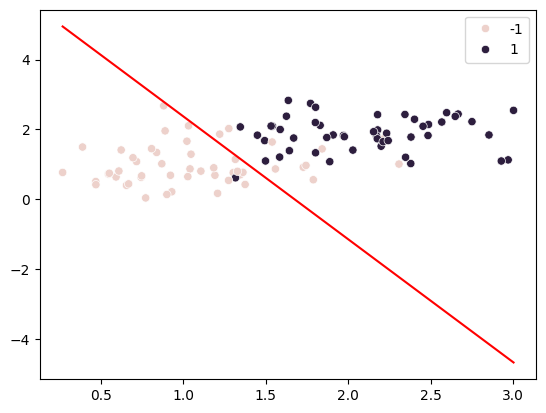

iteration -  2
Current Accuracy =  79.0
W1: 7.0136510230864015, W2: 2.2626471915012933, w0: -11


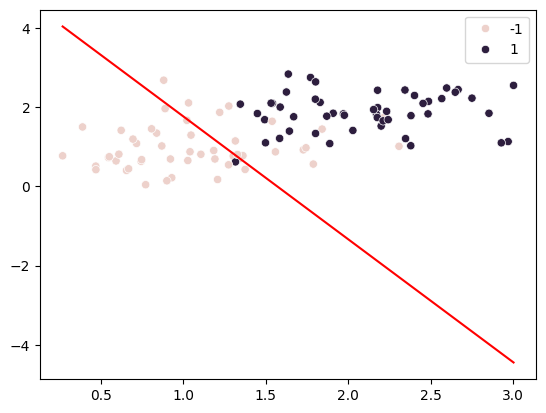

iteration -  3
Current Accuracy =  83.0
W1: 5.724024554933482, W2: 3.3533612943360587, w0: -12


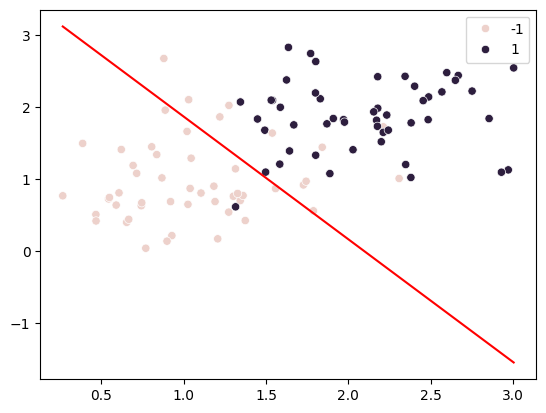

iteration -  4
Current Accuracy =  79.0
W1: 6.765772456321519, W2: 3.917594741658454, w0: -13


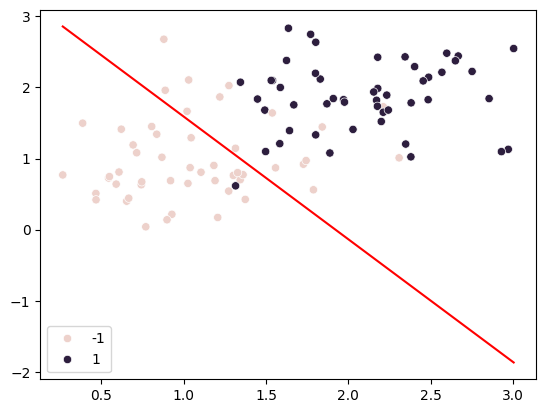

iteration -  5
Current Accuracy =  84.0
W1: 6.166702838412938, W2: 4.990467581785439, w0: -13


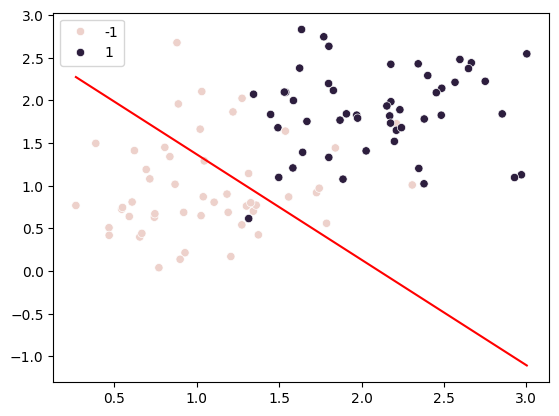

iteration -  6
Current Accuracy =  79.0
W1: 7.100800357608907, W2: 4.435288940308272, w0: -14


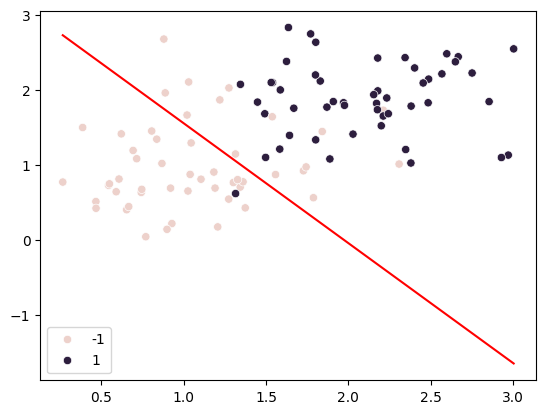

iteration -  7
Current Accuracy =  87.0
W1: 7.259510199951977, W2: 3.168652838076598, w0: -15


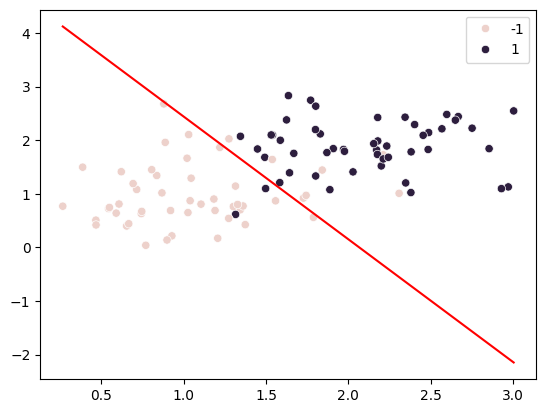

iteration -  8
Current Accuracy =  82.0
W1: 7.358268485511189, W2: 4.8684759782046365, w0: -15


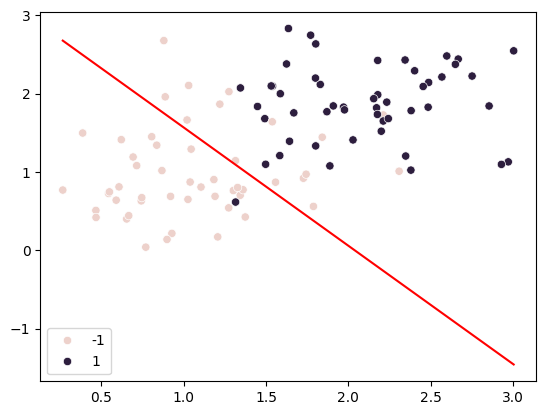

iteration -  9
Current Accuracy =  87.0
W1: 7.516978327854259, W2: 3.6018398759729635, w0: -16


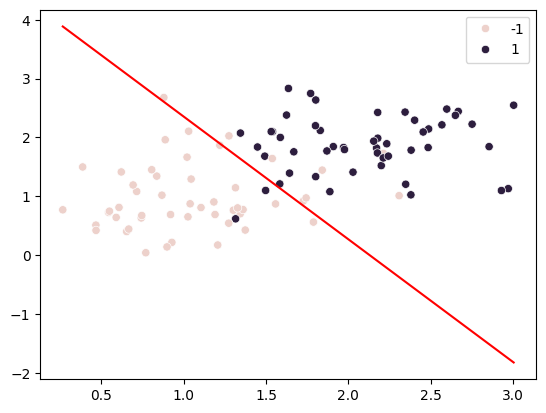

(array([7.51697833, 3.60183988]), np.int64(-16))

In [5]:
perceptron([1,1],1,a,b,iter=10)

# MB way

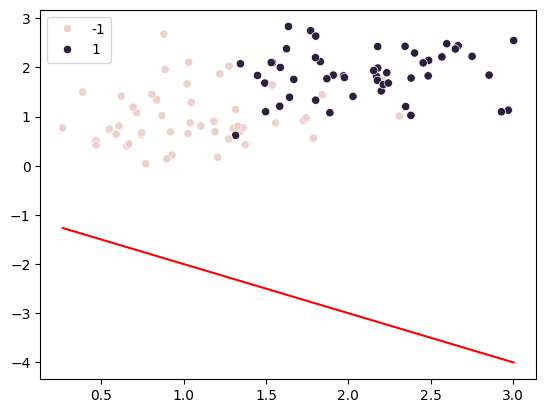

In [6]:
# creating a random classifier line: w = w vector and w0 = bias

w=[1,1]
w0=1

x=np.linspace(np.min(a[:,0]),np.max(a[:,0]),100)
slope = -w[0]/w[1]
intercept=-w0/w[1]
y=slope*x+intercept

sns.scatterplot(x=a[:,0],y=a[:,1],hue=b)
plt.plot(x,y,c='r')
plt.show()


iteration  0
value of ws  [1, 1] 1
updated value of ws  [3.73908006 1.62316427] -6
Current Accuracy =  67.0


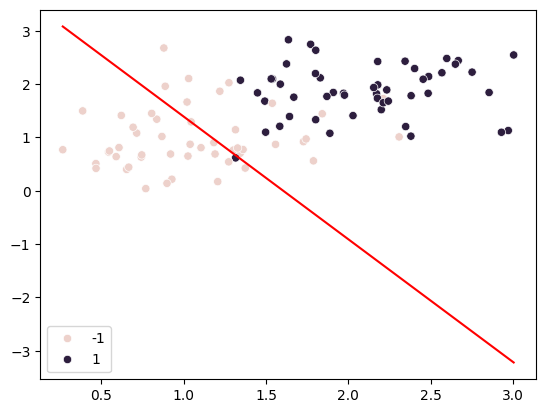

iteration  1
value of ws  [3.73908006 1.62316427] -6
updated value of ws  [5.97190312 1.69841374] -10
Current Accuracy =  72.0


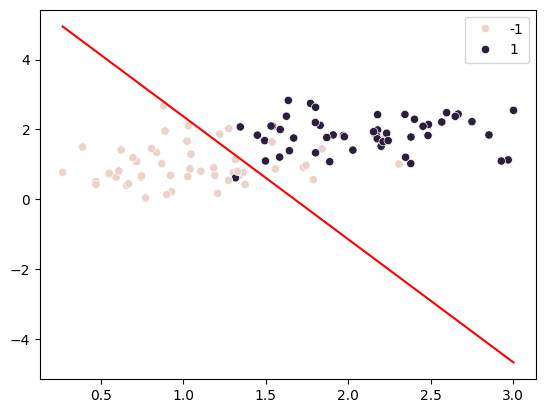

iteration  2
value of ws  [5.97190312 1.69841374] -10
updated value of ws  [7.01365102 2.26264719] -11
Current Accuracy =  79.0


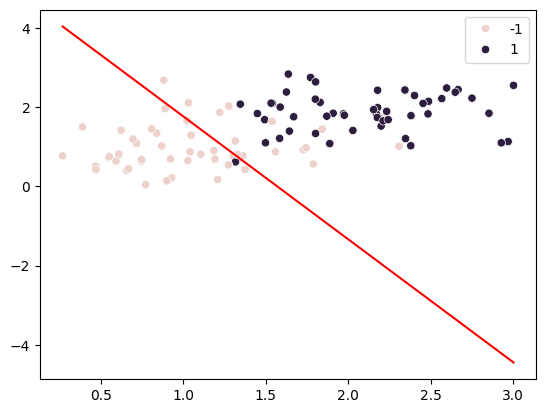

iteration  3
value of ws  [7.01365102 2.26264719] -11
updated value of ws  [5.72402455 3.35336129] -12
Current Accuracy =  83.0


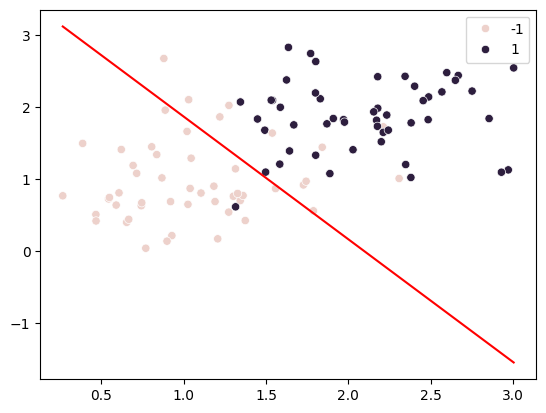

iteration  4
value of ws  [5.72402455 3.35336129] -12
updated value of ws  [6.76577246 3.91759474] -13
Current Accuracy =  79.0


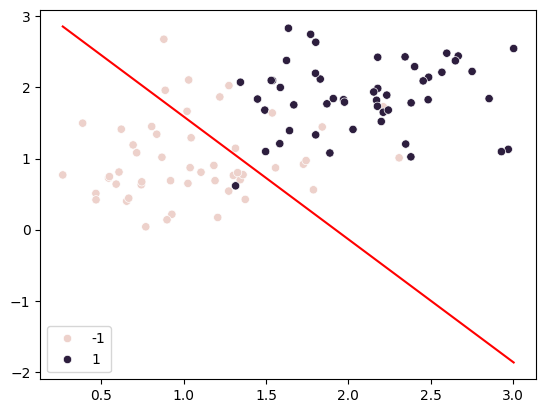

iteration  5
value of ws  [6.76577246 3.91759474] -13
updated value of ws  [6.16670284 4.99046758] -13
Current Accuracy =  84.0


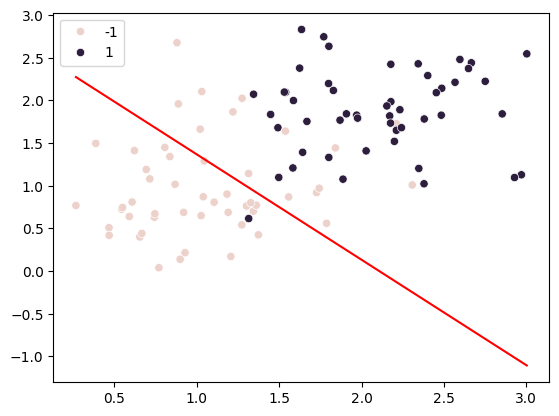

iteration  6
value of ws  [6.16670284 4.99046758] -13
updated value of ws  [7.10080036 4.43528894] -14
Current Accuracy =  79.0


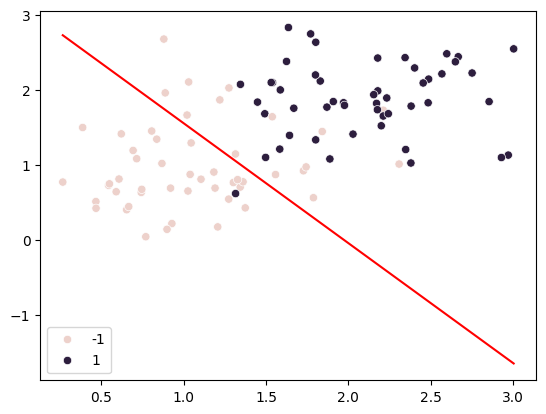

iteration  7
value of ws  [7.10080036 4.43528894] -14
updated value of ws  [7.2595102  3.16865284] -15
Current Accuracy =  87.0


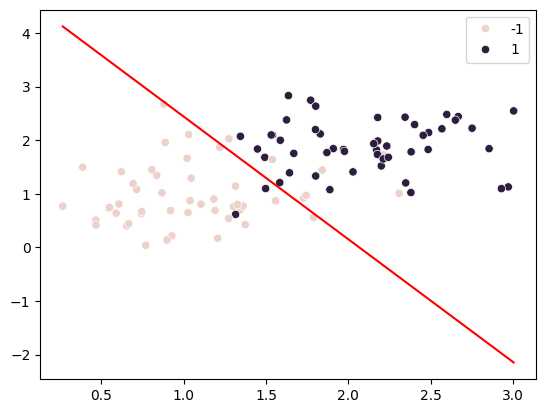

iteration  8
value of ws  [7.2595102  3.16865284] -15
updated value of ws  [7.35826849 4.86847598] -15
Current Accuracy =  82.0


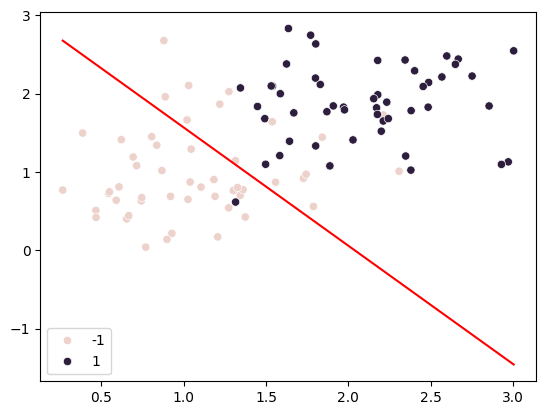

iteration  9
value of ws  [7.35826849 4.86847598] -15
updated value of ws  [7.51697833 3.60183988] -16
Current Accuracy =  87.0


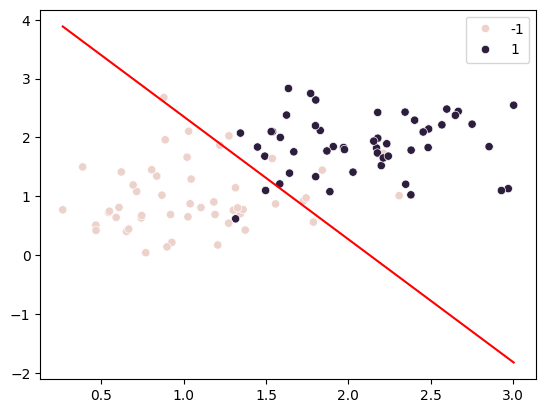

In [7]:
for k in range(10):
    mis_classifcation=0
    print('iteration ',k )
    print('value of ws ',w,w0)
    for i in range(a.shape[0]):
        y_hat=w[0]*a[i][0]+w[1]*(a[i][1])+w0
        if np.sign(y_hat)==b[i]:
            pass
        elif np.sign(y_hat)!=b[i]:
            w=w+a[i]*b[i]
            w0=w0+b[i]
            mis_classifcation = mis_classifcation+1
    print('updated value of ws ',w,w0)
    print("Current Accuracy = ",100 - (mis_classifcation/b.shape[0])*100)
    y=(-(w0/w[1])-w[0]*x/w[1])
    sns.scatterplot(x=a[:,0],y=a[:,1],hue=b)
    plt.plot(x,y,c='r')
    plt.show()

    